# ANALYSIS OF VARIANCE (ANOVA)

## What is one-way ANOVA?

The one-way analysis of variance (ANOVA) is used to determine whether there are any statistically significant differences between the means of three or more independent (unrelated) groups.

### Assumptions of ANOVA
The assumptions of the ANOVA test are the same as the general assumptions for any parametric test:

- __Independence of observations:__ the data were collected using statistically-valid methods, and there are no hidden relationships among observations. 


- __Normally-distributed response variable:__ Your dependent variable should be approximately normally distributed for each category of the independent variable. We talk about the one-way ANOVA only requiring approximately normal data because it is quite "robust" to violations of normality, meaning that assumption can be a little violated and still provide valid results. You can test for normality using the Shapiro-Wilk test of normality.


- __Homogeneity of variance:__ The variation within each group being compared is similar for every group. If the variances are different among the groups, then ANOVA probably isn’t the right fit for the data.

## Explaination by Implementation

Throughout this notebook, We will follow an example on price across different bookstores for used harry potter book. Imagine that we have purchased books many times for our friends at different stores — A, B, C, D and E — and we have calculated prices.

### Data Generation

In [1]:
#importing libraries
import pandas as pd
from numpy import random

In [2]:
#making a list of 5 stores and randomly assigning values
L = ['A','B','C','D','E']
random.seed(30)
L = [random.uniform(5,6, size=(7)),random.uniform(8,15, size=(7)),random.uniform(12,15, size=(7)),random.uniform(9,12, size=(7)),random.uniform(6,8, size=(7))]

In [3]:
#making two lists one with all the store names and other containing the prices corresponding to each stores
all_price = []
store = []
for i in range(len(L)):
    all_price.extend(L[i])
    store.extend(chr(65+i)*len(L[i]))

In [4]:
#making a dataframe with the above lists as columns namely 'store' and 'prices'
data = pd.DataFrame({'store': store, 'price': all_price})
data.head()

,store,price
0,A,5.644144
1,A,5.380748
2,A,5.663048
3,A,5.163651
4,A,5.962608


In [5]:
#using groupby finding the mean price value for each store
df = data.groupby('store').mean().reset_index()
df

,store,price
0,A,5.593230
1,B,11.192844
2,C,13.421479
3,D,10.532318
4,E,6.884683


The average price per store give a first insight in which store is cheaper — in this case, store A.

### How does ANOVA work?

- The ANOVA model starts by estimating the total amount of variation that exists in the price of book across various stores (this is why it is called Analysis of Variance).

- If we ignore the information about the store, the best estimation of price(just looking by the avgs only for now) we could give for new book is apx between 5.59 and 13.42 dollars. Let’s for now call this total variation.

### Data Visualisation

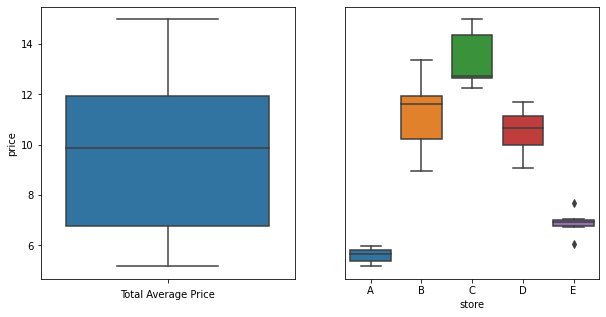

In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(y=data["price"],ax=ax1)
sns.boxplot(x=data['store'],y=data["price"],ax=ax2)
ax2.axes.yaxis.set_ticks([])
ax2.set_ylabel('')
ax1.set_xlabel('Total Average Price')
plt.show()

Above is the comparision of the total and group wise prices boxplots. As we can see in the right plot group A, C and E seems like are heavily skewed which might influence the normality of residuals(one of the assumptions) but we'll check for that later.

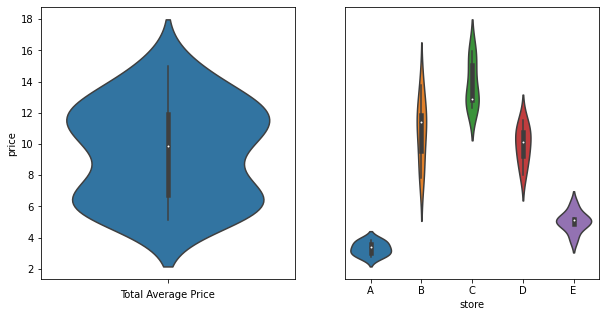

In [7]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
sns.violinplot(y=data["price"],ax=ax1)
sns.violinplot(x=data['store'],y=data["price"],ax=ax2)
ax2.axes.yaxis.set_ticks([])
ax2.set_ylabel('')
ax1.set_xlabel('Total Average Price')
plt.show()

Violin plots have many of the same summary statistics:

- the white dot represents the median
- the thick gray bar in the center represents the interquartile range
- the thin gray line represents the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the interquartile range.
- On each side of the gray line is a kernel density estimation to show the distribution shape of the data. Wider sections of the - violin plot represent a higher probability that members of the population will take on the given value; the skinnier sections represent a lower probability

A_std : 0.314432897118298
B_std : 1.5083396634560164
C_std : 1.1248204215587991
D_std : 0.8964047330385949
E_std : 0.47925949402834644


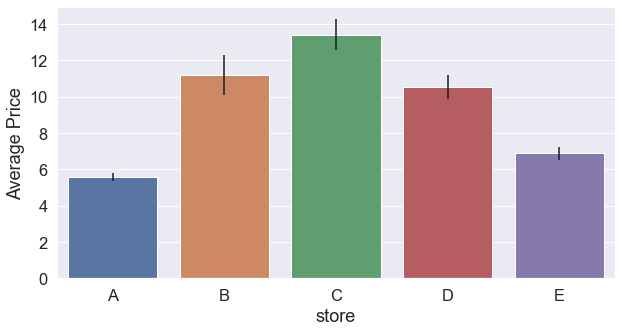

In [8]:
x = ['A','B','C','D','E']
comp_dict = {}

#Assigns each score series to a dictionary key
for comp in x:
    comp_dict[comp] = data[data['store'] == comp]['price']


y = []
yerror = []

#Assigns the mean score and 95% confidence limit to each store
for comp in x:
    y.append(comp_dict[comp].mean())
    yerror.append(1.96*comp_dict[comp].std()/np.sqrt(comp_dict[comp].shape[0]))    
    print(comp + '_std : {}'.format(comp_dict[comp].std()))
       
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(10,5))
ax = sns.barplot(df['store'], df['price'], yerr=yerror)
ax.set_ylabel('Average Price')
plt.show()

From our data exploration, we can see that the average Price are different for each stores except B and D which are comparable. We are interested in knowing if this is caused by random variation in data, or if there is an underlying cause.

we are going to use the 1-way ANOVA test anyway just to understand the concepts.

#### Between-Group Variation is Explained by our Variable Store

If we add the variable store in the graph, we see that if we know which store we purchase book from, we can give a more precise range of prices.

In [9]:
#finding the range for each group
def minmax(val_list):
    """ 
    Function takes a list as input and returns the maximum and minimum value of the list
    Input:
    val_list: list(int)
    
    """
    min_val = min(val_list)
    max_val = max(val_list)

    return (min_val, max_val)

# Range for stores A,B,C,D, and E
for i in df.store:
    print("Range for store "+i+":",minmax(data[data.store==i].price))

Range for store A: (5.1636507261027536, 5.991750992293608)
Range for store B: (8.95364025413333, 13.367985744089538)
Range for store C: (12.269110148357782, 14.982581052892085)
Range for store D: (9.09339224525288, 11.707541529745605)
Range for store E: (6.053248729546229, 7.66943018698683)


This phenomenon is due to the Between-Group variation: a quantification of the variation explained by our variable.

#### Within-Group Variation is not Explained by our Variable Store

However, there is also some part of variation that cannot be explained by our variable ‘store’. for eg. we still don’t know why there is a difference between 8.95 and 13.3 in store B’s price and we would need more variables to explain this.

Since we do not have those new variables, the variation remains unexplained and is called the within-group variation.

### The Null and Alternative Hypothesis

- There are no significant differences between the store's mean Prices.

$$ H_{0}: \mu_{1}=\mu_{2}=\mu_{3}=\mu_{4}=\mu_{5}$$

- There is a significant difference between the store's mean Prices.

$$ H_{a}: \mu_{i}  \neq \mu_{j} $$

Where $\mu_{i}$ and $\mu_{j}$ can be the mean of any store. If there is at least one store with a significant difference with another store, the null hypothesis will be rejected.

### ANOVA: hypothesis test for group differences
When the total variation is split in two, a hypothesis test is applied to find out whether the observed differences in our sample of 35 is significant:

- Is one store giving book at lesser price, or is this random noise due to the sampling effect?

We need a statistical test to give us this answer: the ANOVA F-test.

### Why ANOVA uses F-test and what F-test does?

ANOVA uses the F-test for statistical significance. This allows for comparison of multiple means at once, because the error is calculated for the whole set of comparisons rather than for each individual two-way comparison 

The F-test compares the variance in each group mean from the overall group variance. If the variance within groups is smaller than the variance between groups, the F-test will find a higher F-value, and therefore a higher likelihood that the difference observed is real and not due to chance.

### Formula involved in ANOVA

We can calculate a score for the ANOVA. Then we can look up the score in the F-distribution and obtain a p-value.

- The F-statistic is defined as follows:

$$F = \frac{MS_{b}}{MS_{w}}$$

$$F = \frac{SS_{b}}{K-1}$$

$$SS_{b} = \frac{SS_{w}}{N-K}$$

$$SS_{b} = n_{k}\sum (\bar{x_{k}}-\bar{x_{G}})$$

$$SS_{w} = sum (x_{i}-\bar{x_{G}})^{2}$$

Where $MS_{b}$ is the estimated variance between groups and $MS_{w}$ is the estimated variance within groups, $\bar{x_{k}}$ is the mean within each group, $n_{k}$ is the sample size for each group, $x_{i}$ is the individual data point, and $\bar{x_{G}}$ is the total mean, $SS_{b}$ is sum of squares between the groups and $SS_{w}$ is sum of squares within the groups

This is quite a lot of math, fortunately scipy has a function that plugs in all the values for us.

## 1-Way ANOVA Using StatsModels

This method conducts a one-way ANOVA in two steps:

- Fit the model using an estimation method
   - The default estimation method in most statistical software packages is ordinary least squares
   - If you are not familiar with it and don't care to really dive into it, then just know it's one of many types of estimation methods that aim to provide estimates of the parameter (mean, propertion, etc.) being tested


- Pass fitted model into ANOVA method to produce ANOVA table

In [10]:
#importing stats library
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

def Anova_table(x,y,df):
    """
    This function takes variables(independent and dependent) along with dataframe they were derived from and returns anova 
    table and model

    Inputs:
    x: Explanatory variable (column name)
    y: Response variable/Dependent variable (column name)
    df: The dataframe in which x and y belong
    
    This hypothesis is tested by calculating sums of squares and looking for a variation in y between levels of x
    that exceeds the variation within levels.
    """

    lm = ols('{} ~ {}'.format(x,y),data=df).fit()
    table = sm.stats.anova_lm(lm)
    return lm,table

In [11]:
lm, anova_table = Anova_table('price','store', data)

In [12]:
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
store,4.0,289.863253,72.465813,77.546527,2.226964e-15
Residual,30.0,28.034452,0.934482,NaN,NaN


The ANOVA output provides an estimate of how much variation in the dependent variable that can be explained by the independent variable.

- The first column lists the independent variable along with the model residuals (aka the model error).
- The __Df__ column displays the degrees of freedom for the independent variable (calculated by taking the number of levels within the variable and subtracting 1), and the degrees of freedom for the residuals (calculated by taking the total number of observations minus 1, then subtracting the number of levels in each of the independent variables).
- The __Sum Sq__ column displays the sum of squares (a.k.a. the total variation) between the group means and the overall mean explained by that variable. 
- The __Mean Sq__ column is the mean of the sum of squares, which is calculated by dividing the sum of squares by the degrees of freedom.
- The __F-value__ column is the test statistic from the F test: the mean square of each independent variable divided by the mean square of the residuals. The larger the F value, the more likely it is that the variation associated with the independent variable is real and not due to chance.
- The __Pr(>F)__ column is the p-value of the F-statistic. This shows how likely it is that the F-value calculated from the test would have occurred if the null hypothesis of no difference among group means were true.

__We can treat table as a normal dataframe to extract individual values from it__

In [14]:
anova_table['PR(>F)']

store       2.226964e-15
Residual             NaN
Name: PR(>F), dtype: float64

Since our p-value of 2.226964e-15 is smaller than 0.05, so we can reject our null hypothesis and accept alternate hypothesis i.e There are significant differences between the store's mean Prices.

### ASSUMPTION CHECK

Initially we looked at some assumptions that we did not check for our data, we are going to visit them now.

 __NORMALITY__

- The assumption of normality is tested on the residuals of the model when coming from an ANOVA or regression framework. One method for testing the assumption of normality is the __Shapiro-Wilk test__. This can be completed using the shapiro() method from scipy.stats. The output is (W-test statistic, p-value).


- __What is the Shapiro-Wilk Test?__
  - The Shapiro-Wilk test is a way to tell if a random sample comes from a normal distribution. The test gives you a W value; small values indicate your sample is not normally distributed (you can reject the null hypothesis that your population is normally distributed if your values are under a certain threshold).
  $$ W = \frac{(\sum_{i=1}^{n} {a_{i}x_{i}})^2}{\sum_{i=1}^{n} {(x_{i}-\bar{x})^{2}}}$$
where:
$x_{i}$ are the ordered random sample values
$a_{i}$  are constants generated from the covariances, variances and means of the sample (size n) from a normally distributed sample.

In [15]:
import scipy.stats as stats

stats.shapiro(lm.resid)

(0.9918787479400635, 0.9951302409172058)

- The test is non-significant, W= 0.99187, p= 0.99513(>0.05), which indicates that the residuals are normally distributed.

__HOMOGENEITY OF VARIANCE__

- The final assumption is that all groups have equal variances. One method for testing this assumption is the __Levene's test__ of homogeneity of variances. This can be completed using the levene() method from Scipy.stats.


- __What is the Levene Test?__
   - Levene’s test is used to check that variances are equal for all samples when your data comes from a non normal distribution.
   - The null hypothesis for Levene's test: 
     - the groups we're comparing all have equal population variances.

In [16]:
stats.levene(data['price'][data['store'] == 'A'],
             data['price'][data['store'] == 'B'],
             data['price'][data['store'] == 'C'],
             data['price'][data['store'] == 'D'],
             data['price'][data['store'] == 'E'])

LeveneResult(statistic=2.018619466419008, pvalue=0.11711048835749474)

The Levene's test of homogeneity of variances is not significant as pvalue>0.05 which indicates that the groups have non-statistically significant difference in their varability.

### POST-HOC TESTING
A post hoc test is used only after we find a statistically significant result and need to determine where our differences truly came from.

__Tukey Honestly Significant Difference (HSD)__

Tukey’s test calculates a new critical value that can be used to evaluate whether differences between any two pairs of means are
significant. The critical value is a little different because it involves the mean difference that has to be exceeded to achieve significance. So one simply calculates one critcal value and then the difference between all possible pairs of means. Each difference is then compared to the Tukey critical value. If the difference is larger than the Tukey value, the comparison is significant. The formula for the critical value is as follows

$$\bar {d_{t}} = q_t \sqrt {\frac{MS_{s/A}}{n}}$$

qT is the studentized range statistic, $MS_{s/A}$ is the mean square error from the overall F-test, and n is the sample size for each group.

- Tests all pairwise group comparisons while controlling for the multiple comparisons which protects the familywise error rate and from making a Type I error
- Not technically a "post-hoc" test since this test can be used as a test independently of the ANOVA and can be planned before hand
- Tukey-Kramer Test When sample sizes are unequal, the Tukey HSD test can be modified by replacing $\frac{2}{n}$ with $\frac{1}{n_i} + \frac{1}{n_j}$ in the above formulas. Although the stats function does that by itself.

In [17]:
#For the Tukey test, we assign a variable to the MultiComparison() function,where we provide our response variable('price'),
#the group we are testing (store, in this case),and our alpha value (0.05). Then, we simply print the result.

import statsmodels.stats.multicomp as mc

def Tukey_Table(x,y,data):
    """
    The function returns the tukey results as well as a dataframe which contains all the components of results which 
    can be used later to examine each value
    
    Inputs:
    x: Explanatory variable (column name)
    y: Response variable/Dependent variable (column name)
    data: The dataframe in which x and y belong
    
    """
    comp = mc.MultiComparison(data[x],data[y])
    post_hoc_res = comp.tukeyhsd()
    df = pd.DataFrame(data=post_hoc_res._results_table.data[1:], columns=post_hoc_res._results_table.data[0])
    return post_hoc_res,df

In [18]:
tukey_res,tukey_table = Tukey_Table('price','store',data)

In [19]:
print("mean diffs:", tukey_res.meandiffs)
print("----------------------------------------------------------")
print("std pairs:",tukey_res.std_pairs)
print("----------------------------------------------------------")
print("groups unique: ", tukey_res.groupsunique)
print("----------------------------------------------------------")
print("df total:", tukey_res.df_total)
print("----------------------------------------------------------")
print("df total:", tukey_res)

mean diffs: [ 5.59961414  7.82824917  4.93908825  1.29145245  2.22863503 -0.66052589
 -4.30816169 -2.88916092 -6.53679672 -3.6476358 ]
----------------------------------------------------------
std pairs: [0.36537295 0.36537295 0.36537295 0.36537295 0.36537295 0.36537295
 0.36537295 0.36537295 0.36537295 0.36537295]
----------------------------------------------------------
groups unique:  ['A' 'B' 'C' 'D' 'E']
----------------------------------------------------------
df total: 30
----------------------------------------------------------
df total: Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B   5.5996  0.001  4.1009  7.0984   True
     A      C   7.8282  0.001  6.3295   9.327   True
     A      D   4.9391  0.001  3.4403  6.4378   True
     A      E   1.2915 0.1179 -0.2073  2.7902  False
     B      C   2.2286 0.0014  0.7299  3.7274   True
     B      D  -0.66

Now to make sense of the table.

At the top the table testing information is provided
- __FWER__ is the familywise error rate, i.e. what $\alpha$ is being set to and controlled at
- __group1__ and __group2__ columns are the groups being compared
- __meandiff__ is the difference between the group means
- __p-adj__ is the corrected p-value which takes into account the multiple comparisons being conducted
- __lower__ is the lower band of the confidence interval.
- __upper__ is the upper band of the confidence interval.
- __reject__ is the decision rule based on the corrected p-value.


In [20]:
tukey_table[['group1','group2','p-adj','reject']]

,group1,group2,p-adj,reject
0,A,B,0.0010,True
1,A,C,0.0010,True
2,A,D,0.0010,True
3,A,E,0.1179,False
4,B,C,0.0014,True
5,B,D,0.6840,False
6,B,E,0.0010,True
7,C,D,0.0010,True
8,C,E,0.0010,True
9,D,E,0.0010,True


Above results from Tukey’s HSD suggests that pairwise comparisions for A-E and B-D,  rejects null hypothesis (p < 0.05) and indicates statistical significant differences.

## 1-Way ANOVA (from scratch)

### 1. Sum of Squares Total
Let’s get to the action! What I described before as variation is mathematically measured by the Sum of Squares,

$$\sum_{i=1}^{n} {(y_{i}-\bar{y})^{2}}$$

In [21]:
# compute overall mean
overall_mean = data['price'].mean()
overall_mean

9.524910989733483

In [22]:
# compute Sum of Squares Total
data['overall_mean'] = overall_mean
ss_total = sum((data['price'] - data['overall_mean'])**2)
ss_total

317.8977048893163

This value can be found in the ANOVA table of statsmodels by taking the sum of the sum_sq column.

### 2. Sum of Squares Residual
The computation for residual Sum of Squares is slightly different because it takes not the overall average, but the three group averages.

We need to subtract each value from the mean of its group (the mean of its own store) and then square those differences and sum them.

Here’s how it’s done in Python:

In [23]:
# compute group means
group_means = data.groupby('store').mean()
group_means = group_means.rename(columns = {'price': 'group_mean'})
group_means

,group_mean,overall_mean
store,,
A,5.593230,9.524911
B,11.192844,9.524911
C,13.421479,9.524911
D,10.532318,9.524911
E,6.884683,9.524911


In [24]:
# add group means and overall mean to the original data frame
data = data.merge(group_means, left_on = 'store', right_index = True)

In [25]:
# compute Sum of Squares Residual
ss_residual = sum((data['price'] - data['group_mean'])**2)
ss_residual

28.034452055584985

We can find this value in the ANOVA table of statsmodels under sum_sq at the line Residual.

### 3. Sum of Squares Explained
Having computed the total sum of squares and the residual sum of squares, we can now compute the Explained Sum of Squares using:

$$SS_{total} = SS_{explained} + SS_{residual}$$

Since we already have the SS-Residual and SS-Total, we could do a simple subtraction to get SS-Explained. To get there the hard way, we take the weighted sum of the squared differences between each group means and the overall mean, as follows:

In [26]:
# compute Sum of Squares Model
ss_explained = sum((data['overall_mean_x'] - data['group_mean'])**2)
ss_explained

289.8632528337313

The value can be found in the statsmodels table under sum_sq at the line company.

### 4. Degrees of freedom
The term degrees of freedom (df) refers to the number of independent sample points used to compute a statistic minus the number of parameters estimated from the sample points.
For example, consider the sample estimate of the population variance ( $s^2$ ):


$$s^2 = \frac{\sum_{i=1}^{n} {(x_{i}-x)^{2}}}{n-1}$$ 
where $x_{i}$ is the score for observation i in the sample, x is the sample estimate of the population mean, and n is the number of observations in the sample.

The formula is based on n independent sample points and one estimated population parameter (X). Therefore, the number of degrees of freedom is n minus one. For this example,
df = n - 1

Here,

- df1 = df of the explained part = number of groups — 1
- df2 = df of the residual = number of observations — number of groups

In our example, df1 = 4 and df2 = 30.

### 5. Mean Squares
The statistical test that is central in ANOVA is the F-test. The null hypothesis states that the mean of all groups is equal, which implies that our model has no explanatory value and that we don’t have proof for choosing one store over another to buy the book.

The alternative hypothesis states that at least one of the means is different, which would be a reason to go more in-depth and find out which store or stores are cheaper.

We compute the Mean Squares as follows:

$$MS_{explained} = \frac{SS_{explained}}{df_{explained}}$$
$$MS_{residual} = \frac{SS_{residual}}{df_{residual}}$$

Here’s how it’s done in Python:


In [27]:
# compute Mean Square Residual
n_groups = len(set(data['store']))
n_obs = data.shape[0]
df_residual = n_obs - n_groups
ms_residual = ss_residual / df_residual
ms_residual

0.9344817351861662

### 6. F Statistic

The F-test arises in tests of hypotheses concerning whether or not two population variances are equal and concerning whether or not three or more population means are equal.

We use the Mean Squares to compute the F statistic as the ratio between explained vs unexplained variation:

$$f = \frac{MS_{explained}}{MS_{residual}}$$

Here is the implementation in Python:

In [28]:
# compute Mean Square Explained
df_explained = n_groups - 1
ms_explained = ss_explained / df_explained
ms_explained

72.46581320843282

In [29]:
# compute F-Value
f = ms_explained / ms_residual
f

77.54652710680993

### 7. P-value
In hypothesis testing, the p-value is used to decide whether an alternative hypothesis can be accepted or not (read more on p-values here if necessary).

If the p-value is below 0.05, we reject the null hypothesis in favor of the alternative: this means that at least one group mean is __significantly different__.

We compute the P-Value using the F distribution with df1 and df2 degrees of freedom, in our case an F(4, 30) distribution [If the  K  populations are normally distributed with a common variance and if  H0 : μ1=μ2=⋯=μK  is true then under independent random sampling  F  approximately follows an  F -distribution with degrees of freedom  df1=K−1  and  df2=n−K ].  

Using probability calculation, we find the p-value as follows:

In [30]:
# compute p-value
import scipy.stats
p_value = 1 - scipy.stats.f.cdf(f, df_explained, df_residual)
p_value

2.220446049250313e-15

### 8. Interpret p-value

We have to compare the p-value to our chosen alpha, in this case, 0,05.
Our p-value of 2.220446049250313e-15 is significantly lesser than 0,05, so we can reject our null hypothesis and can accept our alternative. __we do have a statistically significant difference between are 5 samples.__

This means that with the observed data, there is enough evidence to assume a general difference in price of book across the given 5 bookstores .

## Conclusion

In this Notebook, ANOVA has allowed us to statistically test whether sample differences can be generalized as population differences.

This perfectly illustrates the goal of statistical inference: telling whether an observed difference is significant or not.